In [654]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
# 다중 회귀분석
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [655]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [656]:
data = pd.read_csv("../file/data_ver1.csv",index_col=False)
data

,Unnamed: 0,Year,mmfrom1993-2008average,Hole Area,Minimum Ozone,co2,Population,Thickness
0,0,1990,-22.847396,19.2,124.2,22849.92,5.28,2.035898
1,1,1991,-22.814062,18.8,119.0,23056.40,5.37,2.025763
2,2,1992,-20.247396,22.3,114.3,22988.29,5.45,2.024229
3,3,1993,-22.780729,24.2,112.6,23124.00,5.54,1.934320
4,4,1994,-17.980729,23.6,92.3,23260.29,5.62,1.974827
5,5,1996,-11.947396,22.8,108.8,24214.92,5.79,1.896918
6,6,1997,-2.647396,22.1,108.8,25292.92,5.87,1.935293
7,7,1998,-10.814063,25.9,98.8,24895.32,5.95,1.830868
8,8,1999,-0.247396,23.3,102.9,24957.30,6.03,1.770938
9,9,2000,2.952604,24.8,98.7,25637.87,6.11,1.750909


In [657]:
data = data.drop(columns='Unnamed: 0')

In [658]:
data = data.rename(columns={'mmfrom1993-2008average' : 'sealevel'})

In [659]:
data['sealevel']

0    -22.847396
1    -22.814062
2    -20.247396
3    -22.780729
4    -17.980729
5    -11.947396
6     -2.647396
7    -10.814063
8     -0.247396
9      2.952604
10     4.719271
11     2.152604
12    14.619271
13    13.652604
14    12.119271
15     9.519271
16    22.785937
17    30.452604
18    33.652604
19    33.878240
20    36.718471
21    47.173903
22    41.337987
23    53.857372
24    50.461706
25    54.346964
26    57.355991
27    53.085122
Name: sealevel, dtype: float64

In [660]:
target = data[['sealevel']]
feature = data.drop(columns='sealevel')

In [661]:
target.head()
feature.head()

,Year,Hole Area,Minimum Ozone,co2,Population,Thickness
0,1990,19.2,124.2,22849.92,5.28,2.035898
1,1991,18.8,119.0,23056.40,5.37,2.025763
2,1992,22.3,114.3,22988.29,5.45,2.024229
3,1993,24.2,112.6,23124.00,5.54,1.934320
4,1994,23.6,92.3,23260.29,5.62,1.974827


In [662]:
train_input,test_input,train_target,test_target = \
    train_test_split(feature,target)

In [663]:
poly = PolynomialFeatures()
train_poly = poly.fit_transform(train_input)

In [664]:
train_poly.shape

(21, 28)

In [665]:
poly.get_feature_names_out()

array(['1', 'Year', 'Hole Area', 'Minimum Ozone', 'co2', ' Population',
       'Thickness', 'Year^2', 'Year Hole Area', 'Year Minimum Ozone',
       'Year co2', 'Year  Population', 'Year Thickness', 'Hole Area^2',
       'Hole Area Minimum Ozone', 'Hole Area co2',
       'Hole Area  Population', 'Hole Area Thickness', 'Minimum Ozone^2',
       'Minimum Ozone co2', 'Minimum Ozone  Population',
       'Minimum Ozone Thickness', 'co2^2', 'co2  Population',
       'co2 Thickness', ' Population^2', ' Population Thickness',
       'Thickness^2'], dtype=object)

In [666]:
test_poly = poly.transform(test_input)

In [667]:
test_poly.shape

(7, 28)

In [668]:
lr = LinearRegression()
lr.fit(train_poly,train_target)
print("train score :",lr.score(train_poly,train_target))
print("train score :",lr.score(test_poly,test_target))

train score : 1.0
train score : 0.1118884432958146


In [669]:
ss = StandardScaler()
ss.fit(train_poly)

StandardScaler()

In [670]:
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [671]:
ridge = Ridge()
ridge.fit(train_scaled,train_target)
print("train score :",ridge.score(train_scaled,train_target))
print("test score :",ridge.score(test_scaled,test_target))

train score : 0.9854714234180887
test score : 0.9265914808879246


In [672]:
#lr.predict()

In [673]:
ice = pd.read_csv("../file/seaice_area_month_20240604-2.csv")
ice

,날짜,북극 해빙면적 평균(10^6km),남극 해빙면적 평균(10^6km)
0,﻿1981년 01월,11.91,2.84
1,﻿1981년 02월,12.53,1.74
2,﻿1981년 03월,12.71,2.16
3,﻿1981년 04월,12.24,4.07
4,﻿1981년 05월,10.99,7.08
...,...,...,...
515,﻿2023년 12월,10.31,5.84
516,﻿2024년 01월,12.19,2.56
517,﻿2024년 02월,12.73,1.51
518,﻿2024년 03월,13.15,2.11


In [674]:
ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   날짜                  520 non-null    object 
 1   북극 해빙면적 평균(10^6km)  517 non-null    float64
 2   남극 해빙면적 평균(10^6km)  518 non-null    float64
dtypes: float64(2), object(1)
memory usage: 12.3+ KB


In [675]:
ice['날짜'] = ice['날짜'].str.slice(0,5)
ice

,날짜,북극 해빙면적 평균(10^6km),남극 해빙면적 평균(10^6km)
0,﻿1981,11.91,2.84
1,﻿1981,12.53,1.74
2,﻿1981,12.71,2.16
3,﻿1981,12.24,4.07
4,﻿1981,10.99,7.08
...,...,...,...
515,﻿2023,10.31,5.84
516,﻿2024,12.19,2.56
517,﻿2024,12.73,1.51
518,﻿2024,13.15,2.11


In [676]:
ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   날짜                  520 non-null    object 
 1   북극 해빙면적 평균(10^6km)  517 non-null    float64
 2   남극 해빙면적 평균(10^6km)  518 non-null    float64
dtypes: float64(2), object(1)
memory usage: 12.3+ KB


In [677]:
ice_1981 = ice[ice['날짜'].str.contains('1981')]
print(ice_1981['북극 해빙면적 평균(10^6km)'].mean())
print(ice_1981['남극 해빙면적 평균(10^6km)'].mean())

9.146666666666667
8.607499999999998


In [678]:
ice = ice.groupby('날짜').mean()
ice = ice.reset_index()

ice = ice.rename(columns={'날짜' : "Year"})

ice.head()

,Year,북극 해빙면적 평균(10^6km),남극 해빙면적 평균(10^6km)
0,﻿1981,9.146667,8.607500
1,﻿1982,9.525000,8.759167
2,﻿1983,9.430833,8.538333
3,﻿1984,9.012500,8.685833
4,﻿1985,9.105833,8.828333


In [679]:
np.array(ice['Year'])

array(['\ufeff1981', '\ufeff1982', '\ufeff1983', '\ufeff1984',
       '\ufeff1985', '\ufeff1986', '\ufeff1987', '\ufeff1988',
       '\ufeff1989', '\ufeff1990', '\ufeff1991', '\ufeff1992',
       '\ufeff1993', '\ufeff1994', '\ufeff1995', '\ufeff1996',
       '\ufeff1997', '\ufeff1998', '\ufeff1999', '\ufeff2000',
       '\ufeff2001', '\ufeff2002', '\ufeff2003', '\ufeff2004',
       '\ufeff2005', '\ufeff2006', '\ufeff2007', '\ufeff2008',
       '\ufeff2009', '\ufeff2010', '\ufeff2011', '\ufeff2012',
       '\ufeff2013', '\ufeff2014', '\ufeff2015', '\ufeff2016',
       '\ufeff2017', '\ufeff2018', '\ufeff2019', '\ufeff2020',
       '\ufeff2021', '\ufeff2022', '\ufeff2023', '\ufeff2024'],
      dtype=object)

In [680]:
ice['Year'] = ice['Year'].str.replace('\ufeff', '')
ice['Year'] = pd.to_numeric(ice['Year'])

In [681]:
ice

,Year,북극 해빙면적 평균(10^6km),남극 해빙면적 평균(10^6km)
0,1981,9.146667,8.607500
1,1982,9.525000,8.759167
2,1983,9.430833,8.538333
3,1984,9.012500,8.685833
4,1985,9.105833,8.828333
5,1986,9.294167,8.270000
6,1987,9.987000,8.751818
7,1988,9.904545,9.212727
8,1989,9.932500,8.680000
9,1990,9.668333,8.662500


In [682]:
ice['Year'] = pd.to_numeric(ice['Year'])

In [683]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           28 non-null     int64  
 1   sealevel       28 non-null     float64
 2   Hole Area      28 non-null     float64
 3   Minimum Ozone  28 non-null     float64
 4   co2            28 non-null     float64
 5    Population    28 non-null     float64
 6   Thickness      28 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.7 KB


In [684]:
ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                44 non-null     int64  
 1   북극 해빙면적 평균(10^6km)  44 non-null     float64
 2   남극 해빙면적 평균(10^6km)  44 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.2 KB


In [685]:
data_ver2 = pd.merge(data,ice,on='Year',how='inner')

In [686]:
data_ver2.to_csv("../file/data_ver2.csv")

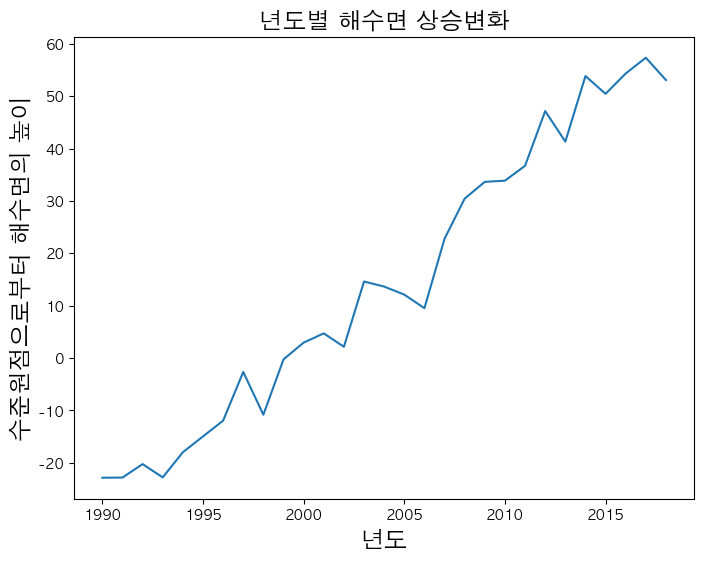

In [687]:
plt.figure(figsize=(8,6))
plt.plot(data['Year'], data['sealevel'])
plt.title('년도별 해수면 상승변화',size=17)
plt.xlabel('년도',size=17)
plt.ylabel('수준원점으로부터 해수면의 높이',size=17)
plt.show()

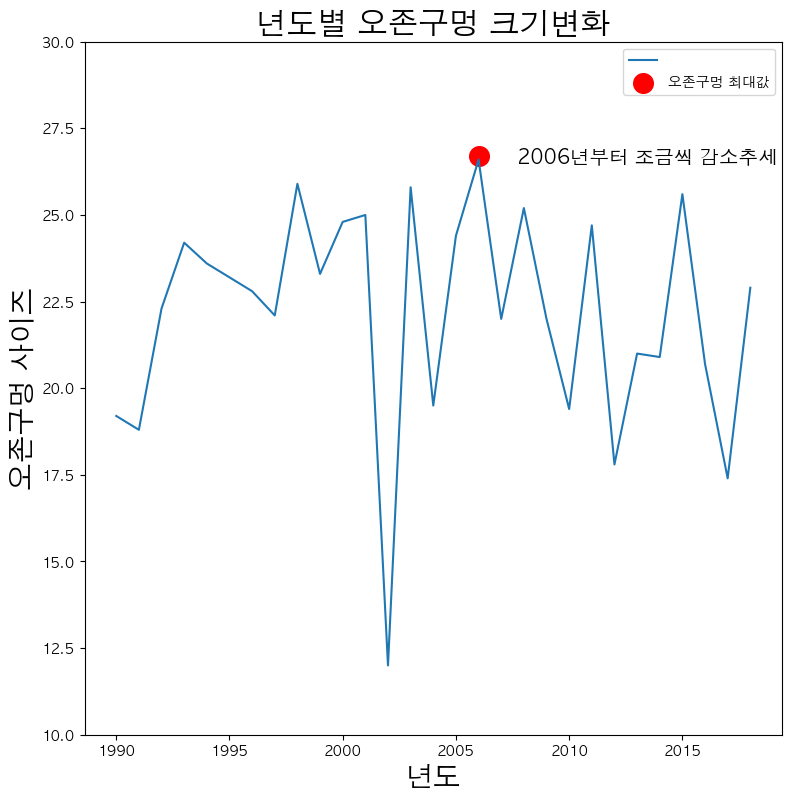

In [688]:
plt.figure(figsize=(9,9))
plt.plot(data['Year'], data['Hole Area'])
plt.title('년도별 오존구멍 크기변화',size=22)
plt.xlabel('년도',size=20)
plt.ylabel('오존구멍 사이즈',size=20)
plt.ylim(10,30)
plt.scatter(2006, 26.7, color='red',s=200)
plt.legend(labels=['','오존구멍 최대값'])
plt.annotate("2006년부터 조금씩 감소추세", xy=(2007.7, 26.5), rotation=0, va='baseline',  fontsize =14)
plt.show()



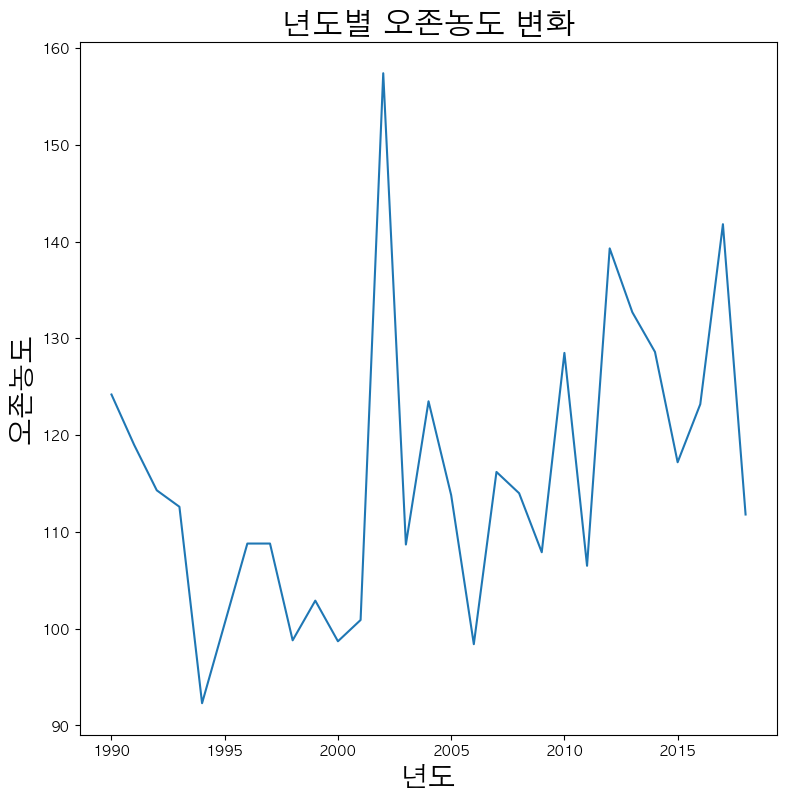

In [689]:
plt.figure(figsize=(9,9))
plt.plot(data['Year'], data['Minimum Ozone'])
plt.title('년도별 오존농도 변화',size=22)
plt.xlabel('년도',size=20)
plt.ylabel('오존농도',size=20)
# plt.scatter(2006, 26.7, color='red',s=200)
#plt.legend(labels=['','오존구멍 최대값'])
#plt.annotate("2006년부터 조금씩 감소추세", xy=(2007.7, 26.5), rotation=0, va='baseline',  fontsize =14)
plt.show()



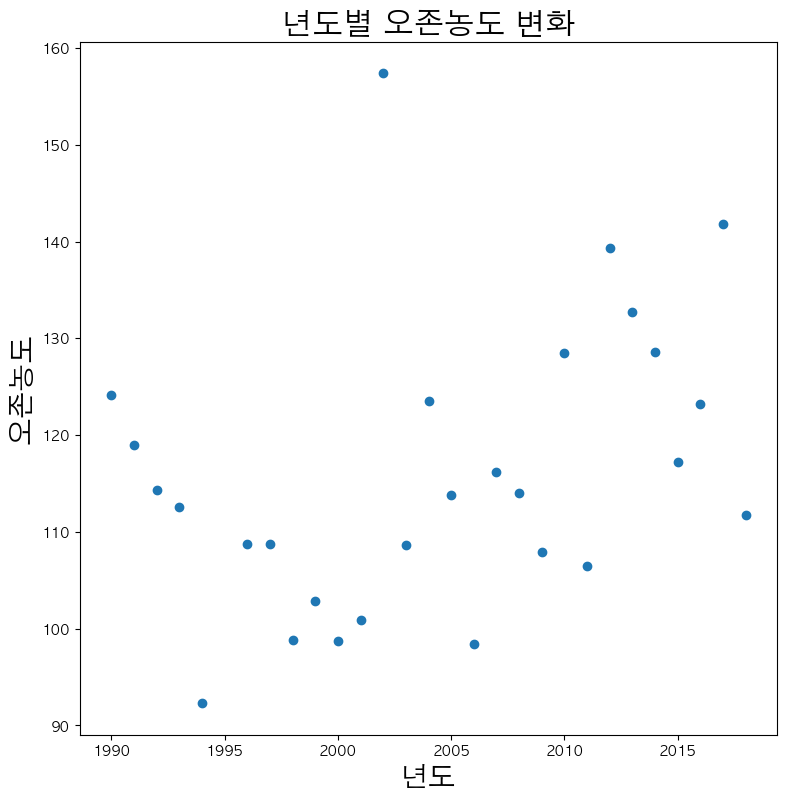

In [690]:
plt.figure(figsize=(9,9))
plt.scatter(data['Year'], data['Minimum Ozone'])
plt.title('년도별 오존농도 변화',size=22)
plt.xlabel('년도',size=20)
plt.ylabel('오존농도',size=20)
# plt.scatter(2006, 26.7, color='red',s=200)
#plt.legend(labels=['','오존구멍 최대값'])
#plt.annotate("2006년부터 조금씩 감소추세", xy=(2007.7, 26.5), rotation=0, va='baseline',  fontsize =14)
plt.show()



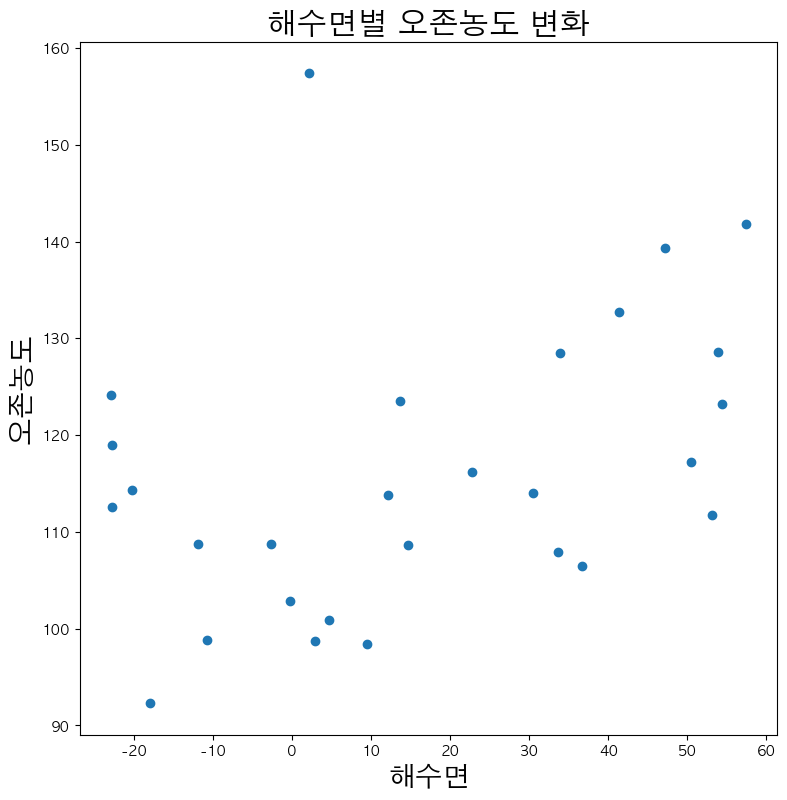

In [691]:
plt.figure(figsize=(9,9))
plt.scatter(data['sealevel'], data['Minimum Ozone'])
plt.title('해수면별 오존농도 변화',size=22)
plt.xlabel('해수면',size=20)
plt.ylabel('오존농도',size=20)
# plt.scatter(2006, 26.7, color='red',s=200)
#plt.legend(labels=['','오존구멍 최대값'])
#plt.annotate("2006년부터 조금씩 감소추세", xy=(2007.7, 26.5), rotation=0, va='baseline',  fontsize =14)
plt.show()


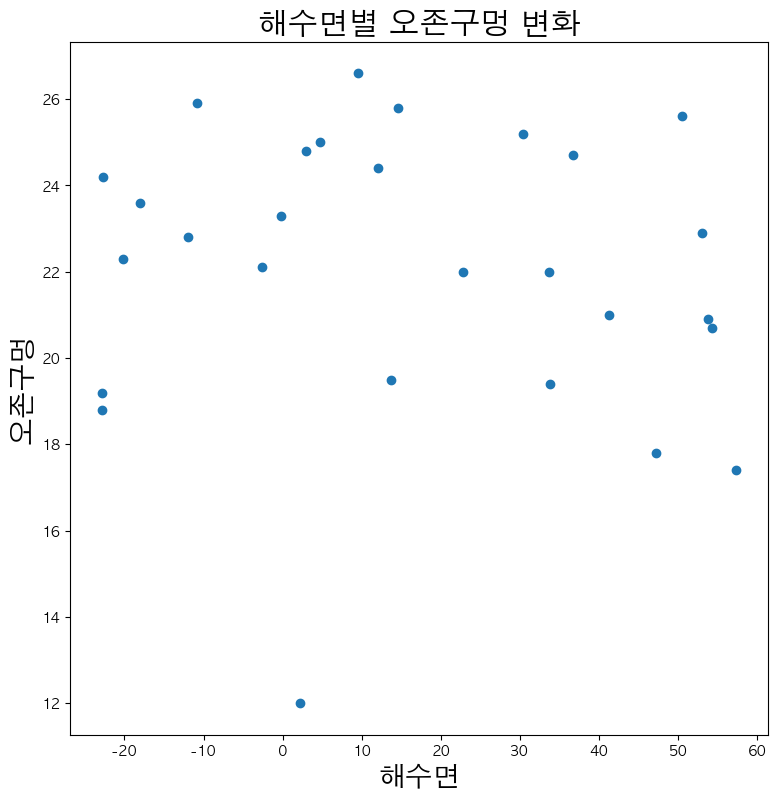

In [692]:
plt.figure(figsize=(9,9))
plt.scatter(data['sealevel'], data['Hole Area'])
plt.title('해수면별 오존구멍 변화',size=22)
plt.xlabel('해수면',size=20)
plt.ylabel('오존구멍',size=20)
# plt.scatter(2006, 26.7, color='red',s=200)
#plt.legend(labels=['','오존구멍 최대값'])
#plt.annotate("2006년부터 조금씩 감소추세", xy=(2007.7, 26.5), rotation=0, va='baseline',  fontsize =14)
plt.show()


In [693]:
print(data['Minimum Ozone'].describe())
print(data['Hole Area'].describe())


count     28.000000
mean     116.100000
std       14.809757
min       92.300000
25%      107.550000
50%      113.900000
75%      123.675000
max      157.400000
Name: Minimum Ozone, dtype: float64
count    28.000000
mean     22.139286
std       3.264777
min      12.000000
25%      20.400000
50%      22.550000
75%      24.725000
max      26.600000
Name: Hole Area, dtype: float64


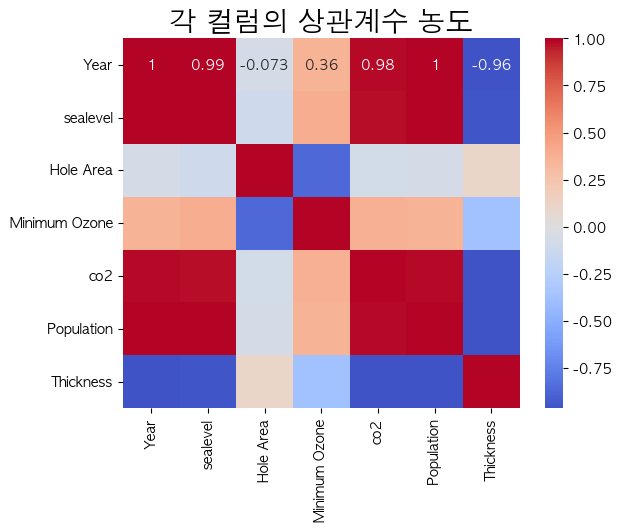

In [694]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('각 컬럼의 상관계수 농도',size=20)
plt.show()

In [695]:
data2 = data.copy()

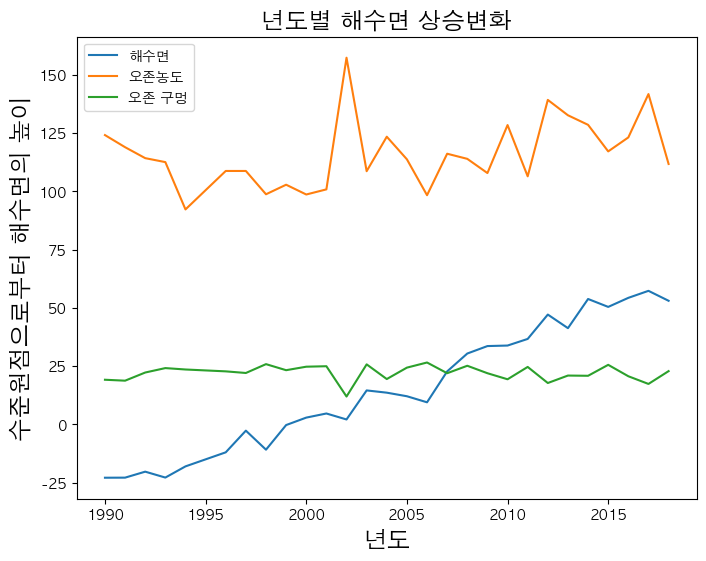

In [696]:
plt.figure(figsize=(8,6))
plt.plot(data['Year'], data['sealevel'],label='해수면')
plt.plot(data['Year'], data['Minimum Ozone'],label='오존농도')
plt.plot(data['Year'], data['Hole Area'],label='오존 구멍')
plt.title('년도별 해수면 상승변화',size=17)
plt.xlabel('년도',size=17)
plt.ylabel('수준원점으로부터 해수면의 높이',size=17)
plt.legend()
plt.show()

In [733]:
tar = np.array(data2['sealevel'])
fea = np.array(data2.drop(columns='sealevel'))
train_input,test_input,train_target,test_target = \
    train_test_split(fea,tar,test_size=0.2)
print(train_input.shape,test_input.shape)

(22, 4) (6, 4)


In [734]:
from sklearn.model_selection import cross_val_score


lr = LinearRegression()
lr.fit(train_input,train_target)
print("train score :",lr.score(train_input,train_target))
print("train score :",lr.score(test_input,test_target))

train score : 0.9692606604049842
train score : 0.9892234137427846


In [699]:

from sklearn.model_selection import cross_validate


scores = cross_validate(lr,train_input,train_target)
print(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.00072718, 0.0003283 , 0.00039411, 0.00026107, 0.00029469]), 'score_time': array([0.00015783, 0.00011706, 0.0001061 , 0.00010109, 0.0001061 ]), 'test_score': array([0.56162231, 0.90846306, 0.92905106, 0.8741572 , 0.67588978])}
0.7898366807500421


In [700]:
np.mean(scores['test_score'])

0.7898366807500421

In [701]:
scores = cross_val_score(lr, train_input, train_target, cv=6)
print(f"교차검증 점수: {scores}")
print(f"교차검증 점수 평균: {scores.mean()}")

교차검증 점수: [0.96365997 0.44579571 0.96525768 0.97312744 0.74164374 0.59738225]
교차검증 점수 평균: 0.7811444657209686


In [735]:
ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [736]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [737]:
ridge = Ridge(alpha=3)
ridge.fit(train_scaled,train_target)
print("train score :",ridge.score(train_scaled,train_target))
print("test score :",ridge.score(test_scaled,test_target))

train score : 0.9655678904507269
test score : 0.9737062307910379


In [705]:

scores = cross_validate(ridge,train_scaled,train_target)
print(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.00040698, 0.00034714, 0.00051212, 0.00020003, 0.00016594]), 'score_time': array([1.38759613e-04, 1.53064728e-04, 1.49011612e-04, 9.67979431e-05,
       9.39369202e-05]), 'test_score': array([0.87748507, 0.92076408, 0.9875773 , 0.95104649, 0.68935601])}
0.8852457905331412


In [721]:
scores = cross_val_score(ridge, train_scaled, train_target, cv=6)
print(f"교차검증 점수: {scores}")
print(f"교차검증 점수 평균: {scores.mean()}")

교차검증 점수: [0.94939456 0.56538325 0.96911327 0.96571234 0.80162782 0.90566015]
교차검증 점수 평균: 0.8594818963897691


In [707]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)   
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [708]:
print(train_poly.shape)
print(test_poly.shape)

(22, 461)
(6, 461)


In [709]:
lr.fit(train_poly,train_target)
print("train score :",lr.score(train_poly,train_target))
print("train score :",lr.score(test_poly,test_target))

train score : 1.0
train score : -4.343515144521715


In [730]:
ss = StandardScaler()
ss.fit(train_poly)

StandardScaler()

In [731]:
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [732]:
ridge = Ridge(alpha=2)
ridge.fit(train_scaled,train_target)
print("train score :",ridge.score(train_scaled,train_target))
print("train score :",ridge.score(test_scaled,test_target))

train score : 0.5098886795343025
train score : -6.256790610683384


In [713]:
scores = cross_validate(ridge,train_scaled,train_target)
print(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.00057912, 0.00083613, 0.00089335, 0.00121903, 0.00067496]), 'score_time': array([0.00039291, 0.00156903, 0.00035381, 0.00032091, 0.00029707]), 'test_score': array([0.67235229, 0.89775948, 0.89264321, 0.89692808, 0.92848568])}
0.857633745587943


In [714]:
scores = cross_val_score(ridge, train_scaled, train_target, cv=6)
print(f"교차검증 점수: {scores}")
print(f"교차검증 점수 평균: {scores.mean()}")

교차검증 점수: [0.95059237 0.52586998 0.9675292  0.96098911 0.80750425 0.92106099]
교차검증 점수 평균: 0.8555909840491988


In [715]:
61.393713	

61.393713

In [716]:
data2 = data.drop(columns=['Hole Area','Minimum Ozone'])

In [738]:
pre_data = [[2019,38000,7.68,1.39]]
new_data_scaled = ss.transform(pre_data)
ridge.predict(new_data_scaled)

array([57.60677396])